In [37]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
with open(filename, 'rb') as file:  
    model = pickle.load(file)

In [21]:
with open(filename1, 'rb') as file:  
    data_df = pickle.load(file)

In [23]:
def group_similar(x):
  
  if len(x)==0:
    return 'empty'
  
  list_group = ['unwell', 'home', 'strike', 'weather','travel', 'emergency', 'personal']
  similar = []
  
  for compare in list_group:  
    compare_with_all = []
    
    for token in x:
      try:
        similarity = model.similarity(compare,token)
        compare_with_all.append(similarity)
        
      except:
        compare_with_all.append(-1)
    
    similar.append(max(compare_with_all))
    
  if max(similar) > 0:
    max_index = similar.index(max(similar))
    return (x[np.argmax(compare_with_all)],list_group[max_index])
  else:
    return (x[np.argmax(compare_with_all)],'other')

In [24]:
data_df['result'] = data_df['noun_phrase'].map(group_similar)

In [25]:
data_df['result'].head()

0    (personel, home)
1      (valley, home)
2      (pain, unwell)
3       (not, unwell)
4       (not, unwell)
Name: result, dtype: object

In [41]:
features =[]
label =[]
uniq_word =[] 
for row in data_df['result']:
    try:
#         if  row[0]  not in uniq_word:
        features.append(model.wv[str(row[0])])
        uniq_word.append(row[0])
        label.append(row[1])
    except:
        continue

/home/anish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [42]:
tsne_model = TSNE(n_components=2,random_state=23)

In [43]:
vect_2D = tsne_model.fit_transform(features)

In [44]:
np.shape(vect_2D)

(11624, 2)

In [45]:
x = []
y = []
for a,b in vect_2D:
    x.append(a)
    y.append(b)

In [47]:
set(label)

{'emergency', 'home', 'm', 'personal', 'strike', 'travel', 'unwell', 'weather'}

(-100.90668903233244,
 100.20348773838712,
 -102.7272644094056,
 98.34381866965951)

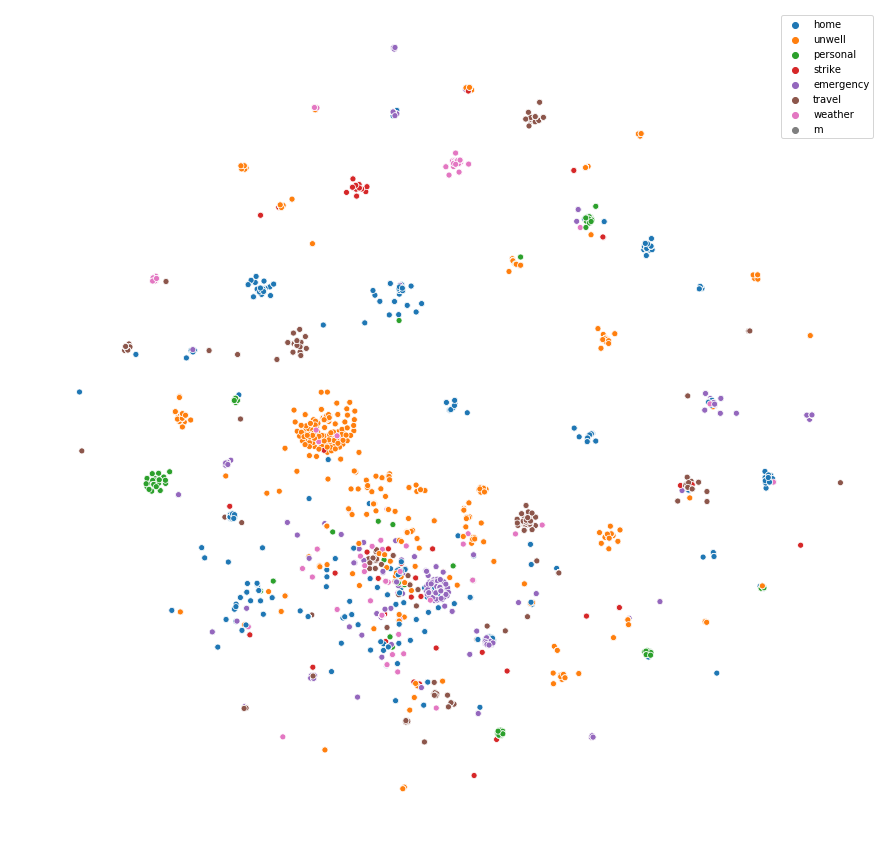

In [48]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=x, y=y,hue=label)
plt.axis('off')